## Vader Sentiment Analyzer

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

vader_sentiments_list = []
sid_obj = SentimentIntensityAnalyzer()

def derive_sentiment(text):

  # Remove HTML tags
  text = re.sub('<[^<]+?>', '', text)
  
  # Remove punctuation and special characters
  text = re.sub('[^A-Za-z0-9]+', ' ', text)
  
  # Convert text to lowercase
  text = text.lower()

  sentiment_dict = sid_obj.polarity_scores(text)
  negative = sentiment_dict['neg']
  neutral = sentiment_dict['neu']
  positive = sentiment_dict['pos']
  compound = sentiment_dict['compound']

  if sentiment_dict['compound'] >= 0.05 :
      overall_sentiment = "POS"

  elif sentiment_dict['compound'] <= - 0.05 :
      overall_sentiment = "NEG"

  else :
      overall_sentiment = "NEU"
  return overall_sentiment

In [ ]:
pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.1 MB/s eta 0:00:00


In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.9 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
derive_sentiment('It was ridiculosly good')

'POS'

In [ ]:
vader_sentiments_list

['NEG', 'POS', 'POS', 'POS']

In [ ]:
import pandas as pd
data_merged = pd.read_csv('/content/data_merged_new.csv')
data_merged

,Title,review/score,review/text,authors,categories,ratingsCount,User_id,cleaned_review,sentiment,tokens,processed_tokens
0,Jurassic Park,2.0,"An evil, sleazy book, unheroic and malevolentl...",Michael Crichton,Fiction,1677.0,A3NK6P0QFDUZL2,an evil sleazy book unheroic and malevolently ...,Negative,"['an', 'evil', 'sleazy', 'book', 'unheroic', '...","['evil', 'sleazy', 'book', 'unheroic', 'malevo..."
1,The Thinking Woman's Guide to a Better Birth,1.0,This book was not what I thought is would be. ...,Henci Goer,Health & Fitness,8.0,A2B2PQ7E9BGGQF,this book was not what i thought is would be i...,Negative,"['this', 'book', 'was', 'not', 'what', 'i', 't...","['book', 'thought', 'would', 'extremely', 'one..."
2,Disgrace: Complete & Unabridged,1.0,This book drives home the fact that awards are...,J. M. Coetzee,Fiction,111.0,A3A8LDU2UVG7SV,this book drives home the fact that awards are...,Negative,"['this', 'book', 'drives', 'home', 'the', 'fac...","['book', 'drive', 'home', 'fact', 'award', 'po..."
3,Man in the Shadows: Inside the Middle East Cri...,1.0,This book is long and boring account of an int...,Efraim Halevy,Political Science,2.0,A1NNEAWPJN1MYG,this book is long and boring account of an int...,Negative,"['this', 'book', 'is', 'long', 'and', 'boring'...","['book', 'long', 'boring', 'account', 'intelli..."
4,House Atreides,2.0,Dune: House Atreides is the first in the expan...,"Brian Herbert', 'Kevin J. Anderson', 'Frank He...",Fiction,28.0,A3VSIDO2HTQ2P0,dune house atreides is the first in the expans...,Negative,"['dune', 'house', 'atreides', 'is', 'the', 'fi...","['dune', 'house', 'atreides', 'first', 'expans..."
...,...,...,...,...,...,...,...,...,...,...,...
269995,The Coming Fury,5.0,To Whom It May Concern:While I am not an exper...,"Bruce Catton', 'Everette Beach Long",United States,11.0,A3G0UP308TILPI,to whom it may concern while i am not an exper...,Positive,"['to', 'whom', 'it', 'may', 'concern', 'while'...","['may', 'concern', 'expert', 'civil', 'war', '..."
269996,THE MALTESE FALCON - A Sam Spade Mystery,4.0,"Seventy-five years ago, San Francisco private ...",Dashiell Hammett,Fiction,136.0,A10XZH78SDOI5M,seventy five years ago san francisco private d...,Positive,"['seventy', 'five', 'years', 'ago', 'san', 'fr...","['seventy', 'five', 'year', 'ago', 'san', 'fra..."
269997,The Abundance Book,4.0,The book was exactly what i thought it would b...,John Randolph Price,Business & Economics,3.0,A3GJ8NFE6RVMAD,the book was exactly what i thought it would b...,Positive,"['the', 'book', 'was', 'exactly', 'what', 'i',...","['book', 'exactly', 'thought', 'would', 'motiv..."
269998,The Innocent Man: Murder and Injustice in a Sm...,5.0,I can't say I loved this book simply because i...,John Grisham,Social Science,82.0,A1EHUJDP2ILNX5,i can t say i loved this book simply because i...,Positive,"['i', 'can', 't', 'say', 'i', 'loved', 'this',...","['say', 'loved', 'book', 'simply', 'true', 'st..."


In [ ]:
data_merged.shape

(270000, 11)

In [ ]:
import pandas as pd

# convert column to list
book_list = data_merged['Title'].unique().tolist()

# print the list
print(book_list)


['Jurassic Park', "The Thinking Woman's Guide to a Better Birth", 'Disgrace: Complete & Unabridged', "Man in the Shadows: Inside the Middle East Crisis with a Director of Israel's Mossad", 'House Atreides', 'The City of Falling Angels', 'Easy Prey', 'Improve Your Vision Without Glasses or Contact Lenses', 'Catch 22', 'The Trespasser', 'Extreme Denial', 'After the Kiss', 'A Portrait of the Artist As a Young Man by James Joyce', 'ERAGON: INHERITANCE, BOOK ONE.', 'The Last Templar', 'Rich Dad, Poor Dad', 'Moonfall', 'Incubus Dreams (Anita Blake, Vampire Hunter, Book 12)', 'The Bear and the Dragon', 'Anno Dracula', 'The Adventures of Huckleberry Finn (Courage Literary Classics)', 'Cruising Guide to San Diego Bay', 'The Smoke Jumper', 'Blood meridian, or, The evening redness in the west (Picador)', 'I Stink!', 'The Mystery of Capital: Why Capitalism Triumphs in the West and Fails Everywhere Else', 'If You Could See Me Now', 'Violin A Novel', 'World Lit Only By Fire', 'Revolutionary Road', '

In [ ]:
import csv
# open a CSV file for writing
with open('book_list.csv', mode='w', newline='') as file:
    
    # create a writer object
    writer = csv.writer(file)
    
    # write the list to the file
    writer.writerow(book_list)

In [ ]:
#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader_sentiments_list = []
sid_obj = SentimentIntensityAnalyzer()
for sentence in data_merged['cleaned_review']:
  sentiment_dict = sid_obj.polarity_scores(sentence)
  negative = sentiment_dict['neg']
  neutral = sentiment_dict['neu']
  positive = sentiment_dict['pos']
  compound = sentiment_dict['compound']

  if sentiment_dict['compound'] >= 0.05 :
      overall_sentiment = "POS"

  elif sentiment_dict['compound'] <= - 0.05 :
      overall_sentiment = "NEG"

  else :
      overall_sentiment = "NEU"
  vader_sentiments_list.append(overall_sentiment)

In [ ]:
vader_sentiments_list

In [61]:
from sklearn.preprocessing import LabelEncoder


# create a LabelEncoder object
le = LabelEncoder()

# fit the LabelEncoder to the labels and transform the labels
vader_list = le.fit_transform(vader_sentiments_list)

# print the encoded labels
print(vader_list)



[2 0 2 ... 2 0 2]


In [62]:
vader_arr =  np.array(vader_list)

In [58]:
data_merged

,Title,review/score,review/text,authors,categories,ratingsCount,User_id,cleaned_review,sentiment,tokens,processed_tokens,label
0,Jurassic Park,2.0,"An evil, sleazy book, unheroic and malevolentl...",Michael Crichton,Fiction,1677.0,A3NK6P0QFDUZL2,an evil sleazy book unheroic and malevolently ...,Negative,"['an', 'evil', 'sleazy', 'book', 'unheroic', '...","['evil', 'sleazy', 'book', 'unheroic', 'malevo...",0
1,The Thinking Woman's Guide to a Better Birth,1.0,This book was not what I thought is would be. ...,Henci Goer,Health & Fitness,8.0,A2B2PQ7E9BGGQF,this book was not what i thought is would be i...,Negative,"['this', 'book', 'was', 'not', 'what', 'i', 't...","['book', 'thought', 'would', 'extremely', 'one...",0
2,Disgrace: Complete & Unabridged,1.0,This book drives home the fact that awards are...,J. M. Coetzee,Fiction,111.0,A3A8LDU2UVG7SV,this book drives home the fact that awards are...,Negative,"['this', 'book', 'drives', 'home', 'the', 'fac...","['book', 'drive', 'home', 'fact', 'award', 'po...",0
3,Man in the Shadows: Inside the Middle East Cri...,1.0,This book is long and boring account of an int...,Efraim Halevy,Political Science,2.0,A1NNEAWPJN1MYG,this book is long and boring account of an int...,Negative,"['this', 'book', 'is', 'long', 'and', 'boring'...","['book', 'long', 'boring', 'account', 'intelli...",0
4,House Atreides,2.0,Dune: House Atreides is the first in the expan...,"Brian Herbert', 'Kevin J. Anderson', 'Frank He...",Fiction,28.0,A3VSIDO2HTQ2P0,dune house atreides is the first in the expans...,Negative,"['dune', 'house', 'atreides', 'is', 'the', 'fi...","['dune', 'house', 'atreides', 'first', 'expans...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
269995,The Coming Fury,5.0,To Whom It May Concern:While I am not an exper...,"Bruce Catton', 'Everette Beach Long",United States,11.0,A3G0UP308TILPI,to whom it may concern while i am not an exper...,Positive,"['to', 'whom', 'it', 'may', 'concern', 'while'...","['may', 'concern', 'expert', 'civil', 'war', '...",2
269996,THE MALTESE FALCON - A Sam Spade Mystery,4.0,"Seventy-five years ago, San Francisco private ...",Dashiell Hammett,Fiction,136.0,A10XZH78SDOI5M,seventy five years ago san francisco private d...,Positive,"['seventy', 'five', 'years', 'ago', 'san', 'fr...","['seventy', 'five', 'year', 'ago', 'san', 'fra...",2
269997,The Abundance Book,4.0,The book was exactly what i thought it would b...,John Randolph Price,Business & Economics,3.0,A3GJ8NFE6RVMAD,the book was exactly what i thought it would b...,Positive,"['the', 'book', 'was', 'exactly', 'what', 'i',...","['book', 'exactly', 'thought', 'would', 'motiv...",2
269998,The Innocent Man: Murder and Injustice in a Sm...,5.0,I can't say I loved this book simply because i...,John Grisham,Social Science,82.0,A1EHUJDP2ILNX5,i can t say i loved this book simply because i...,Positive,"['i', 'can', 't', 'say', 'i', 'loved', 'this',...","['say', 'loved', 'book', 'simply', 'true', 'st...",2


In [63]:
vader_arr

array([2, 0, 2, ..., 2, 0, 2])

In [59]:
y_arr = np.array(data_merged['label'])

In [60]:
y_arr

array([0, 0, 0, ..., 2, 2, 2])

In [64]:
from sklearn.metrics import classification_report


print(classification_report(y_arr, vader_arr, target_names=le.classes_))

              precision    recall  f1-score   support

         NEG       0.56      0.39      0.46     90000
         NEU       0.33      0.02      0.04     90000
         POS       0.39      0.88      0.54     90000

    accuracy                           0.43    270000
   macro avg       0.43      0.43      0.35    270000
weighted avg       0.43      0.43      0.35    270000



In [ ]:
y_test = pd.read_pickle("/content/y_test.pkl")

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_merged['label'] = le.fit_transform(data_merged['sentiment'])

In [ ]:
from sklearn.metrics import classification_report


print(classification_report(y_test, vader_sentiments_list, target_names=le.classes_))

In [ ]:
import joblib

# load the saved model from the joblib file
nb_model = joblib.load('multinomial_nb_model.joblib')

In [ ]:
lr_model = joblib.load('Logistic_Regression_model.joblib')

In [ ]:
X_test_vec = pd.read_pickle("/content/X_test_vec.pkl")

In [ ]:
y_pred = nb_model.predict(X_test_vec)

In [ ]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       0.67      0.65      0.66     17932
     Neutral       0.56      0.58      0.57     18037
    Positive       0.71      0.70      0.70     18031

    accuracy                           0.64     54000
   macro avg       0.65      0.64      0.65     54000
weighted avg       0.65      0.64      0.65     54000



In [ ]:
y_pred

array([2, 2, 1, ..., 1, 2, 2])

In [ ]:
y_pred_dict = dict(zip(range(len(y_pred)), y_pred))

In [42]:
import plotly.graph_objects as go
import numpy as np


labels = ['Positive', 'Negative', 'Neutral']
# colors = ['#FFA07A', '#98FB98', '#FFD700']

# create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=y_pred)])

# update the pie chart layout
fig.update_layout(title='Pie Chart of Predicted Values for Multinomial Naive Bayes')

# show the pie chart
fig.show()


In [43]:
y_pred_lr = lr_model.predict(X_test_vec)

In [44]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       0.70      0.69      0.70     17932
     Neutral       0.60      0.57      0.59     18037
    Positive       0.72      0.75      0.74     18031

    accuracy                           0.67     54000
   macro avg       0.67      0.67      0.67     54000
weighted avg       0.67      0.67      0.67     54000



In [45]:
import plotly.graph_objects as go
import numpy as np


labels = ['Positive', 'Negative', 'Neutral']
# colors = ['#FFA07A', '#98FB98', '#FFD700']

# create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=y_pred_lr)])

# update the pie chart layout
fig.update_layout(title='Pie Chart of Predicted Values for Logistic Regression')

# show the pie chart
fig.show()


In [46]:
rf_model = joblib.load('random_forest_model.joblib')

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:318: UserWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:318: UserWarning:

Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [47]:
y_pred_rf = rf_model.predict(X_test_vec)

In [48]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       0.69      0.71      0.70     17932
     Neutral       0.63      0.62      0.62     18037
    Positive       0.72      0.72      0.72     18031

    accuracy                           0.68     54000
   macro avg       0.68      0.68      0.68     54000
weighted avg       0.68      0.68      0.68     54000



In [50]:
import plotly.graph_objects as go
import numpy as np


labels = ['Positive', 'Negative', 'Neutral']
# colors = ['#FFA07A', '#98FB98', '#FFD700']

# create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=y_pred_rf)])

# update the pie chart layout
fig.update_layout(title='Pie Chart of Predicted Values for Random Forest')

# show the pie chart
fig.show()


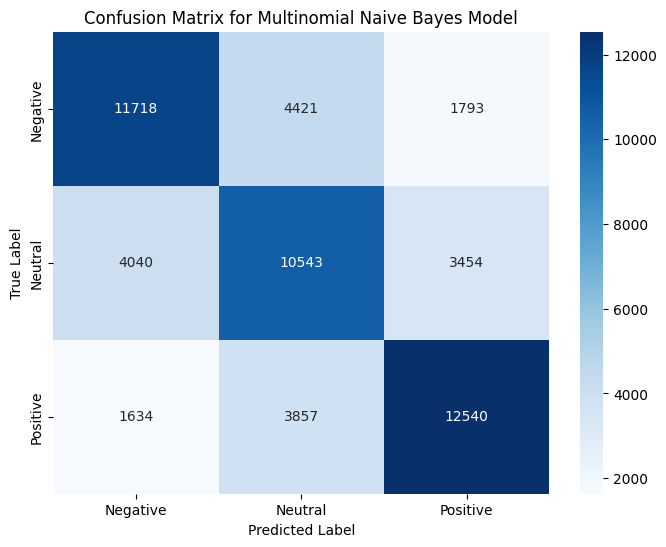

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# assuming y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])

plt.title('Confusion Matrix for Multinomial Naive Bayes Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

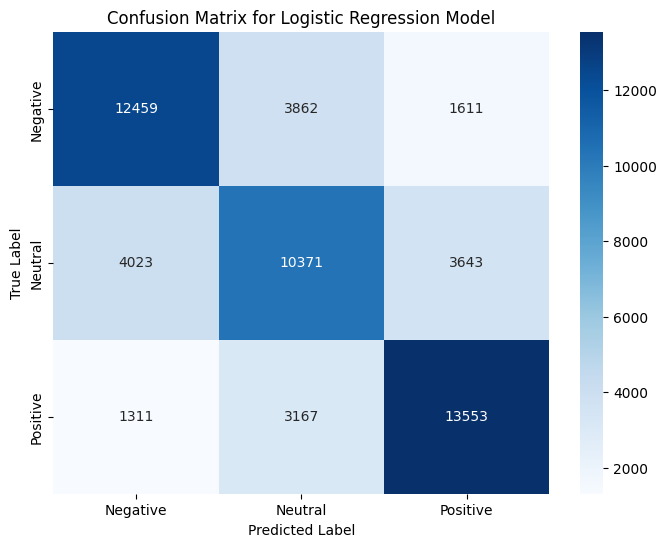

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# assuming y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred_lr)

# create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])

plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

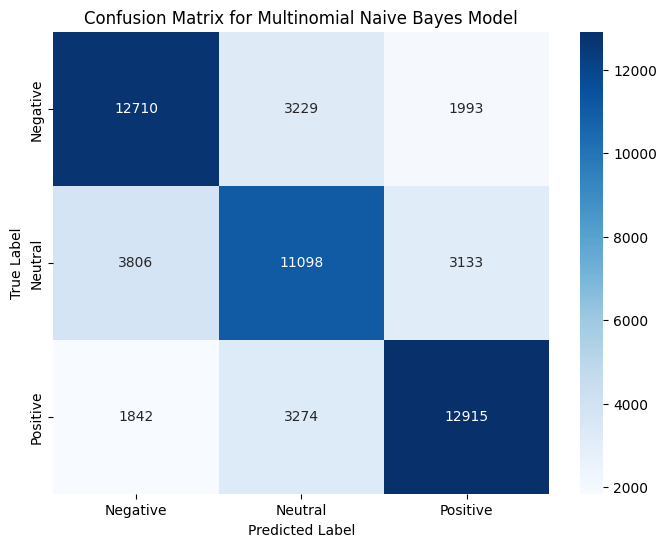

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# assuming y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred_rf)

# create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])

plt.title('Confusion Matrix for Multinomial Naive Bayes Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()